### Question 1
### Analyze the data in CARD.csv. A good analysis will include matplotlib, groupbys, and linear models (of some kind).

In [96]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

### Data Processing

In [97]:
card = pd.read_csv('CARD.csv')
card.head()

,id,nearc2,nearc4,educ,age,fatheduc,motheduc,weight,momdad14,sinmom14,...,smsa66,wage,enroll,KWW,IQ,married,libcrd14,exper,lwage,expersq
0,2,0,0,7,29,NaN,NaN,158413,1,0,...,1,548,0,15.0,NaN,1.0,0.0,16,6.306275,256
1,3,0,0,12,27,8.0,8.0,380166,1,0,...,1,481,0,35.0,93.0,1.0,1.0,9,6.175867,81
2,4,0,0,12,34,14.0,12.0,367470,1,0,...,1,721,0,42.0,103.0,1.0,1.0,16,6.580639,256
3,5,1,1,11,27,11.0,12.0,380166,1,0,...,1,250,0,25.0,88.0,1.0,1.0,10,5.521461,100
4,6,1,1,12,34,8.0,7.0,367470,1,0,...,1,729,0,34.0,108.0,1.0,0.0,16,6.591674,256


In [98]:
card.tail()

,id,nearc2,nearc4,educ,age,fatheduc,motheduc,weight,momdad14,sinmom14,...,smsa66,wage,enroll,KWW,IQ,married,libcrd14,exper,lwage,expersq
3005,5218,0,1,12,25,8.0,12.0,82135,1,0,...,0,335,0,15.0,NaN,1.0,0.0,7,5.814130,49
3006,5219,0,1,13,34,NaN,NaN,88765,1,0,...,0,481,0,43.0,NaN,1.0,1.0,15,6.175867,225
3007,5220,0,1,12,24,11.0,NaN,89271,0,0,...,0,500,0,25.0,109.0,1.0,0.0,6,6.214608,36
3008,5221,0,1,12,31,NaN,NaN,110376,1,0,...,0,713,0,32.0,107.0,1.0,1.0,13,6.569481,169
3009,5225,0,1,13,26,NaN,NaN,81081,0,0,...,0,525,1,27.0,NaN,1.0,0.0,7,6.263398,49


In [99]:
# The dataset have 3010 roaws and 34 columns
card.shape

(3010, 34)

In [100]:
#Show column names
card.columns

Index(['id', 'nearc2', 'nearc4', 'educ', 'age', 'fatheduc', 'motheduc',
       'weight', 'momdad14', 'sinmom14', 'step14', 'reg661', 'reg662',
       'reg663', 'reg664', 'reg665', 'reg666', 'reg667', 'reg668', 'reg669',
       'south66', 'black', 'smsa', 'south', 'smsa66', 'wage', 'enroll', 'KWW',
       'IQ', 'married', 'libcrd14', 'exper', 'lwage', 'expersq'],
      dtype='object')

In [101]:
float_card = [var for var in card.columns if card[var].dtype=='float64']
print('There are {} columns with float64 data type\n'.format(len(float_card)))
print(float_card)

There are 7 columns with float64 data type

['fatheduc', 'motheduc', 'KWW', 'IQ', 'married', 'libcrd14', 'lwage']


In [102]:
card[float_card].head()

,fatheduc,motheduc,KWW,IQ,married,libcrd14,lwage
0,NaN,NaN,15.0,NaN,1.0,0.0,6.306275
1,8.0,8.0,35.0,93.0,1.0,1.0,6.175867
2,14.0,12.0,42.0,103.0,1.0,1.0,6.580639
3,11.0,12.0,25.0,88.0,1.0,1.0,5.521461
4,8.0,7.0,34.0,108.0,1.0,0.0,6.591674


In [103]:
int_card = [var for var in card.columns if card[var].dtype=='int64']
print('There are {} columns with int64 data type\n'.format(len(int_card)))
print(int_card)

There are 27 columns with int64 data type

['id', 'nearc2', 'nearc4', 'educ', 'age', 'weight', 'momdad14', 'sinmom14', 'step14', 'reg661', 'reg662', 'reg663', 'reg664', 'reg665', 'reg666', 'reg667', 'reg668', 'reg669', 'south66', 'black', 'smsa', 'south', 'smsa66', 'wage', 'enroll', 'exper', 'expersq']


In [104]:
card[int_card].head()

,id,nearc2,nearc4,educ,age,weight,momdad14,sinmom14,step14,reg661,...,reg669,south66,black,smsa,south,smsa66,wage,enroll,exper,expersq
0,2,0,0,7,29,158413,1,0,0,1,...,0,0,1,1,0,1,548,0,16,256
1,3,0,0,12,27,380166,1,0,0,1,...,0,0,0,1,0,1,481,0,9,81
2,4,0,0,12,34,367470,1,0,0,1,...,0,0,0,1,0,1,721,0,16,256
3,5,1,1,11,27,380166,1,0,0,0,...,0,0,0,1,0,1,250,0,10,100
4,6,1,1,12,34,367470,1,0,0,0,...,0,0,0,1,0,1,729,0,16,256


In [105]:
card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3010 entries, 0 to 3009
Data columns (total 34 columns):
id          3010 non-null int64
nearc2      3010 non-null int64
nearc4      3010 non-null int64
educ        3010 non-null int64
age         3010 non-null int64
fatheduc    2320 non-null float64
motheduc    2657 non-null float64
weight      3010 non-null int64
momdad14    3010 non-null int64
sinmom14    3010 non-null int64
step14      3010 non-null int64
reg661      3010 non-null int64
reg662      3010 non-null int64
reg663      3010 non-null int64
reg664      3010 non-null int64
reg665      3010 non-null int64
reg666      3010 non-null int64
reg667      3010 non-null int64
reg668      3010 non-null int64
reg669      3010 non-null int64
south66     3010 non-null int64
black       3010 non-null int64
smsa        3010 non-null int64
south       3010 non-null int64
smsa66      3010 non-null int64
wage        3010 non-null int64
enroll      3010 non-null int64
KWW         2963 non-null

In [106]:
#Describe statistic
card.describe()

,id,nearc2,nearc4,educ,age,fatheduc,motheduc,weight,momdad14,sinmom14,...,smsa66,wage,enroll,KWW,IQ,married,libcrd14,exper,lwage,expersq
count,3010.000000,3010.000000,3010.000000,3010.000000,3010.000000,2320.000000,2657.000000,3.010000e+03,3010.000000,3010.000000,...,3010.000000,3010.000000,3010.000000,2963.000000,2061.000000,3003.000000,2997.000000,3010.000000,3010.000000,3010.000000
mean,2581.748837,0.440864,0.682060,13.263455,28.119601,10.003448,10.348137,3.211853e+05,0.789369,0.100664,...,0.649502,577.282392,0.092359,33.540668,102.449782,2.271395,0.674341,8.856146,6.261832,95.579070
std,1500.538849,0.496573,0.465753,2.676913,3.137004,3.720737,3.179671,1.706458e+05,0.407825,0.300934,...,0.477205,262.958302,0.289580,8.611619,15.423756,2.066823,0.468699,4.141672,0.443798,84.618314
min,2.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,7.560700e+04,0.000000,0.000000,...,0.000000,100.000000,0.000000,4.000000,50.000000,1.000000,0.000000,0.000000,4.605170,0.000000
25%,1275.500000,0.000000,0.000000,12.000000,25.000000,8.000000,8.000000,1.227980e+05,1.000000,0.000000,...,0.000000,394.250000,0.000000,28.000000,93.000000,1.000000,0.000000,6.000000,5.976985,36.000000
50%,2541.000000,0.000000,1.000000,13.000000,28.000000,10.000000,12.000000,3.652000e+05,1.000000,0.000000,...,1.000000,537.500000,0.000000,34.000000,103.000000,1.000000,1.000000,8.000000,6.286928,64.000000
75%,3858.750000,1.000000,1.000000,16.000000,31.000000,12.000000,12.000000,4.060240e+05,1.000000,0.000000,...,1.000000,708.750000,0.000000,40.000000,113.000000,4.000000,1.000000,11.000000,6.563503,121.000000
max,5225.000000,1.000000,1.000000,18.000000,34.000000,18.000000,18.000000,1.752340e+06,1.000000,1.000000,...,1.000000,2404.000000,1.000000,56.000000,149.000000,6.000000,1.000000,23.000000,7.784889,529.000000


In [107]:
# Summarize missing values
# We can see that most missing values occur in father education, mother education and IQ.

card.isnull().sum()

id            0
nearc2        0
nearc4        0
educ          0
age           0
fatheduc    690
motheduc    353
weight        0
momdad14      0
sinmom14      0
step14        0
reg661        0
reg662        0
reg663        0
reg664        0
reg665        0
reg666        0
reg667        0
reg668        0
reg669        0
south66       0
black         0
smsa          0
south         0
smsa66        0
wage          0
enroll        0
KWW          47
IQ          949
married       7
libcrd14     13
exper         0
lwage         0
expersq       0
dtype: int64

In [108]:
missing_dt = card.isnull().sum().sum()/card.size
print('There are {:.2f}% missing values across the dataset\n'.format(missing_dt*100))

There are 2.01% missing values across the dataset



In [109]:
card[card.isna().any(axis=1)]

,id,nearc2,nearc4,educ,age,fatheduc,motheduc,weight,momdad14,sinmom14,...,smsa66,wage,enroll,KWW,IQ,married,libcrd14,exper,lwage,expersq
0,2,0,0,7,29,NaN,NaN,158413,1,0,...,1,548,0,15.0,NaN,1.0,0.0,16,6.306275,256
14,16,1,1,16,31,NaN,8.0,648053,0,1,...,1,894,0,43.0,116.0,1.0,1.0,9,6.795706,81
15,17,1,1,14,24,15.0,12.0,357519,1,0,...,1,300,0,36.0,NaN,6.0,1.0,4,5.703783,16
17,20,1,1,14,29,NaN,12.0,496635,0,1,...,1,658,0,35.0,100.0,1.0,1.0,9,6.489205,81
20,26,1,1,18,32,12.0,13.0,367470,1,0,...,1,944,0,43.0,NaN,1.0,1.0,8,6.850126,64
21,29,1,1,18,34,NaN,8.0,408301,1,0,...,1,614,0,50.0,114.0,1.0,1.0,10,6.419995,100
23,31,0,1,12,28,14.0,12.0,380166,1,0,...,1,604,0,44.0,NaN,1.0,1.0,10,6.403574,100
26,36,0,1,12,26,7.0,12.0,367772,1,0,...,1,300,0,27.0,NaN,6.0,1.0,8,5.703783,64
29,39,0,1,14,29,NaN,16.0,496635,0,1,...,0,632,0,45.0,102.0,1.0,1.0,9,6.448889,81
31,48,1,1,12,25,NaN,11.0,102031,0,1,...,1,457,0,40.0,104.0,6.0,1.0,7,6.124683,49


In [110]:
# Since there are 1,410 rows with missing values, which has 46.84% across the whole rows, so we can not drop.
missing_row = card[card.isna().any(axis=1)].shape[0]/card.shape[0]
print('There are {:.2f}% rows have missing values across the whole dataset\n'.format(missing_row*100))

There are 46.84% rows have missing values across the whole dataset



In [111]:
flag = 0
  
# using set() + len() 
# to check all unique list elements 
flag = len(set(card["id"])) == len(card["id"]) 

if(flag) : 
    print ("List contains all unique elements") 
else :  
    print ("List contains does not contains all unique elements")

List contains all unique elements


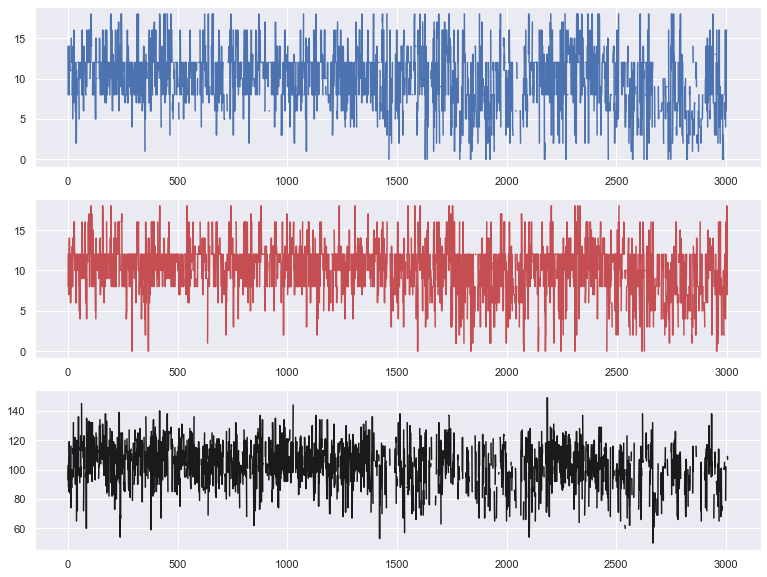

In [112]:
# Before fixing the missing values
fig, axs = plt.subplots(3,1,figsize=(13,10))
plt.subplot(311)
plt.plot(card["fatheduc"], 'b')

plt.subplot(312)
plt.plot(card["motheduc"], 'r')

plt.subplot(313)
plt.plot(card["IQ"], 'k')
plt.show()

In [113]:
# Replace NA to mean
card["fatheduc"].replace(to_replace=np.nan, value=card["fatheduc"].mean(), inplace=True)
card["motheduc"].replace(to_replace=np.nan, value=card["motheduc"].mean(), inplace=True)
card["IQ"].replace(to_replace=np.nan, value=card["IQ"].mean(), inplace=True)

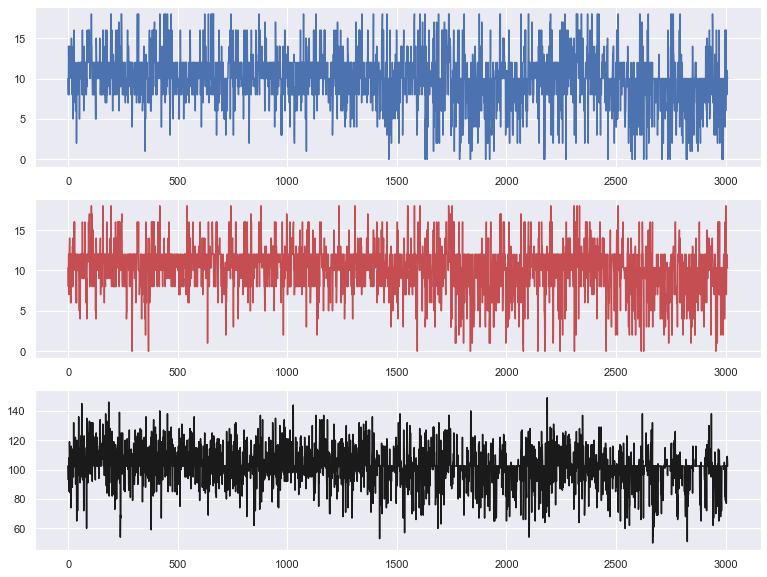

In [114]:
# After fixing the missing values
fig, axs = plt.subplots(3,1,figsize=(13,10))
plt.subplot(311)
plt.plot(card["fatheduc"], 'b')

plt.subplot(312)
plt.plot(card["motheduc"], 'r')

plt.subplot(313)
plt.plot(card["IQ"], 'k')
plt.show()

In [115]:
card[card.isna().any(axis=1)].shape

(66, 34)

In [116]:
new_card = card.dropna()
new_card.shape

(2944, 34)

In [117]:
card.columns

Index(['id', 'nearc2', 'nearc4', 'educ', 'age', 'fatheduc', 'motheduc',
       'weight', 'momdad14', 'sinmom14', 'step14', 'reg661', 'reg662',
       'reg663', 'reg664', 'reg665', 'reg666', 'reg667', 'reg668', 'reg669',
       'south66', 'black', 'smsa', 'south', 'smsa66', 'wage', 'enroll', 'KWW',
       'IQ', 'married', 'libcrd14', 'exper', 'lwage', 'expersq'],
      dtype='object')

In [118]:
col_name = [j for j in new_card.columns]
cat = [new_card[i].unique() for i in new_card.columns]

for i in range(len(new_card.columns)):
    if len(cat[i])>2:
        print(col_name[i])
        print(len(cat[i]))

id
2944
educ
18
age
11
fatheduc
20
motheduc
20
weight
347
wage
749
KWW
50
IQ
93
married
6
exper
24
lwage
749
expersq
24


### Data Visualization 

In [119]:
%matplotlib inline
from pandas.plotting import scatter_matrix

col=["educ","age","fatheduc","motheduc","weight",
   "wage","KWW","IQ","married","exper","lwage","expersq"]
attributes =new_card.loc[:, col] 
attributes


,educ,age,fatheduc,motheduc,weight,wage,KWW,IQ,married,exper,lwage,expersq
0,7,29,10.003448,10.348137,158413,548,15.0,102.449782,1.0,16,6.306275,256
1,12,27,8.000000,8.000000,380166,481,35.0,93.000000,1.0,9,6.175867,81
2,12,34,14.000000,12.000000,367470,721,42.0,103.000000,1.0,16,6.580639,256
3,11,27,11.000000,12.000000,380166,250,25.0,88.000000,1.0,10,5.521461,100
4,12,34,8.000000,7.000000,367470,729,34.0,108.000000,1.0,16,6.591674,256
5,12,26,9.000000,12.000000,380166,500,38.0,85.000000,1.0,8,6.214608,64
6,18,33,14.000000,14.000000,367470,565,41.0,119.000000,1.0,9,6.336826,81
7,14,29,14.000000,14.000000,496635,608,46.0,108.000000,1.0,9,6.410175,81
8,12,28,12.000000,12.000000,367772,425,32.0,96.000000,4.0,10,6.052089,100
9,12,29,12.000000,12.000000,480445,515,34.0,97.000000,1.0,11,6.244167,121


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024072D1F3C8>,
      dtype=object)

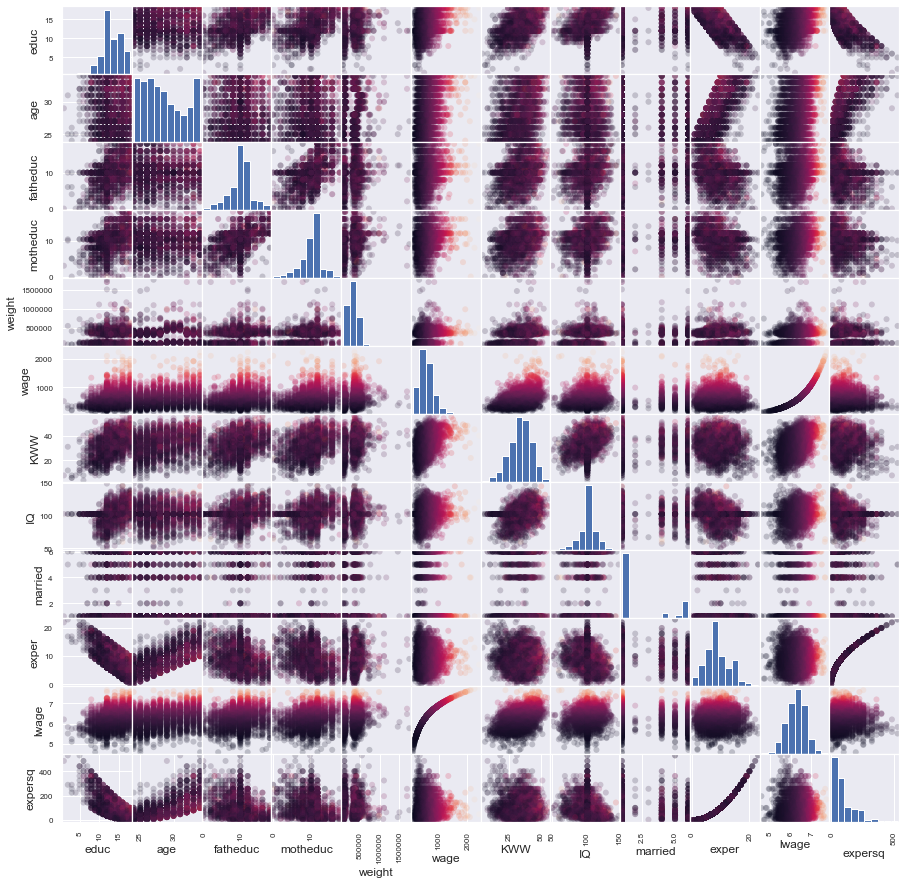

In [120]:
scatter_matrix(attributes, figsize = (15,15), c = new_card['wage'], alpha = 0.2, marker = 'O')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000240207A2EF0>,
      dtype=object)

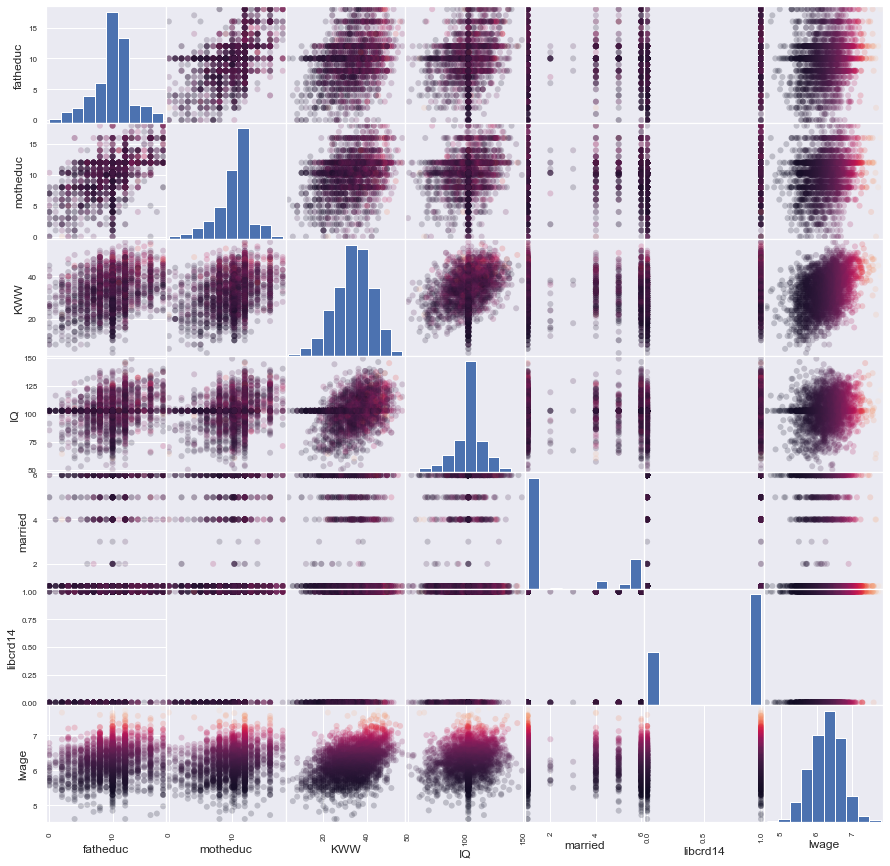

In [121]:
attributes =new_card.drop(columns=['id']).select_dtypes(include='float64').columns
scatter_matrix(new_card[attributes], figsize = (15,15), c = new_card['wage'], alpha = 0.2, marker = 'O')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002401929DE10>,
      dtype=object)

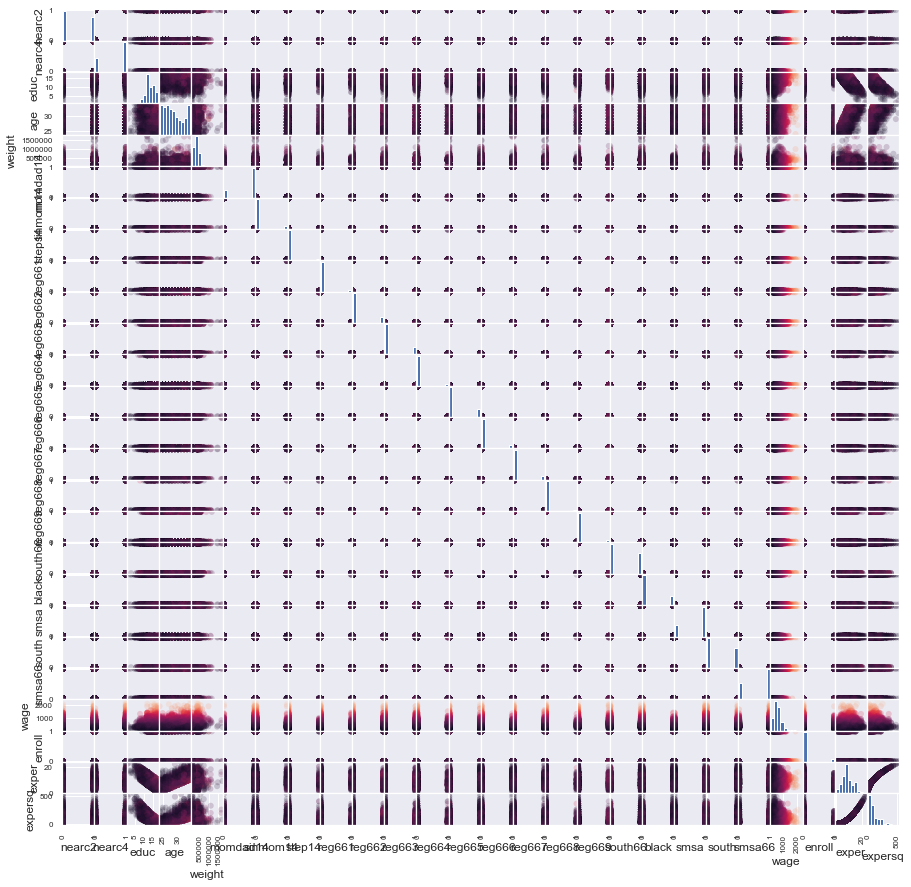

In [122]:
attributes =new_card.drop(columns=['id']).select_dtypes(include='int64').columns
scatter_matrix(new_card[attributes], figsize = (15,15), c = new_card['wage'], alpha = 0.2, marker = 'O')

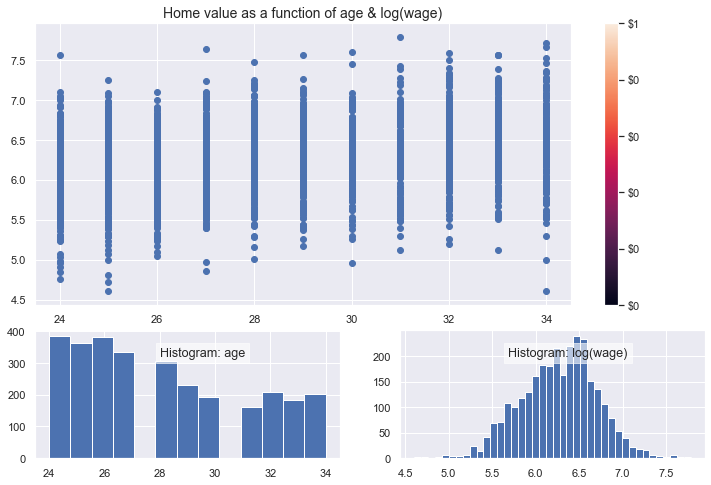

In [123]:
def add_titlebox(ax, text):
    ax.text(.55, .8, text,
            horizontalalignment='center',
            transform=ax.transAxes,
            bbox=dict(facecolor='white', alpha=0.6),
            fontsize=12.5)
    return ax

gridsize = (3, 2)
fig = plt.figure(figsize=(12, 8))
ax1 = plt.subplot2grid(gridsize, (0, 0), colspan=2, rowspan=2)
ax2 = plt.subplot2grid(gridsize, (2, 0))
ax3 = plt.subplot2grid(gridsize, (2, 1))

ax1.set_title('Home value as a function of age & log(wage)', fontsize=14)
sctr = ax1.scatter(x=new_card["age"], y=new_card["lwage"], cmap='RdYlGn')
plt.colorbar(sctr, ax=ax1, format='$%d')
ax2.hist(new_card["age"], bins='auto')
ax3.hist(new_card["lwage"], bins='auto')

add_titlebox(ax2, 'Histogram: age')
add_titlebox(ax3, 'Histogram: log(wage)')

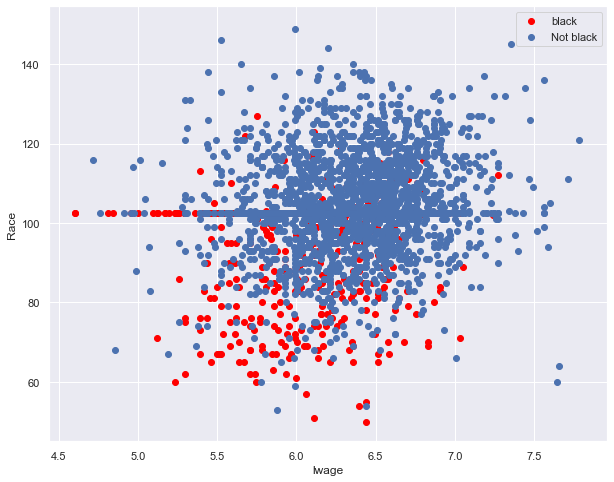

In [124]:
plt.figure(figsize=(10, 8))

plt.scatter(x=new_card.lwage[new_card.black==1], y=new_card.IQ[(new_card.black==1)], c="red")
plt.scatter(x=new_card.lwage[new_card.black==0], y=new_card.IQ[(new_card.black==0)])

plt.legend(["black", "Not black"])
plt.xlabel("lwage")
plt.ylabel("Race")

plt.show()

<Figure size 576x432 with 0 Axes>

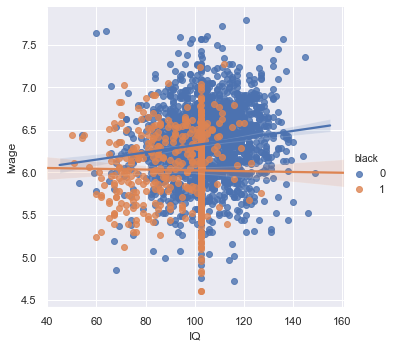

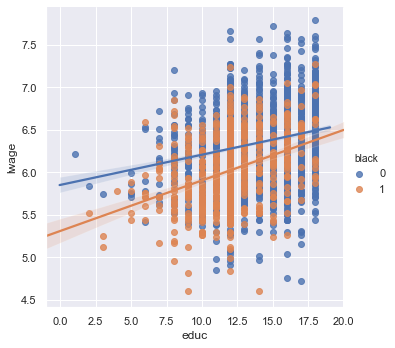

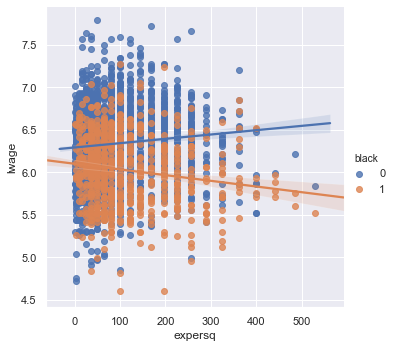

In [125]:
import seaborn as sns; sns.set(color_codes=True)

plt.figure(figsize=(8, 6))
plot1 = sns.lmplot(x="IQ" , y="lwage", hue="black", data=new_card)
plot2 = sns.lmplot(x="educ" , y="lwage", hue="black", data=new_card)
plot3 = sns.lmplot(x="expersq" , y="lwage", hue="black", data=new_card)

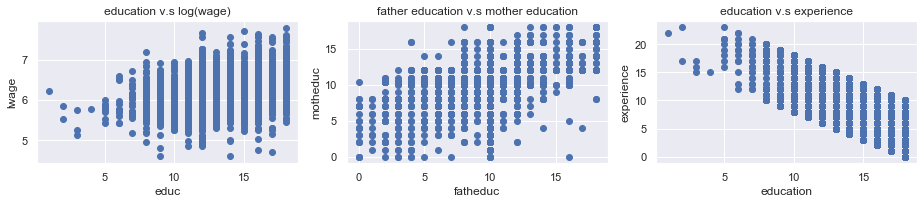

In [126]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(13,3))

ax1.scatter(new_card.educ, new_card.lwage)
ax1.set_title('education v.s log(wage)')
ax1.set_xlabel("educ")
ax1.set_ylabel("lwage")

ax2.scatter(new_card.fatheduc, new_card.motheduc)
ax2.set_title("father education v.s mother education")
ax2.set_xlabel("fatheduc")
ax2.set_ylabel("motheduc")

ax3.scatter(new_card.educ, new_card.exper)
ax3.set_title("education v.s experience")
ax3.set_xlabel("education")
ax3.set_ylabel("experience")

fig.tight_layout()
plt.show()

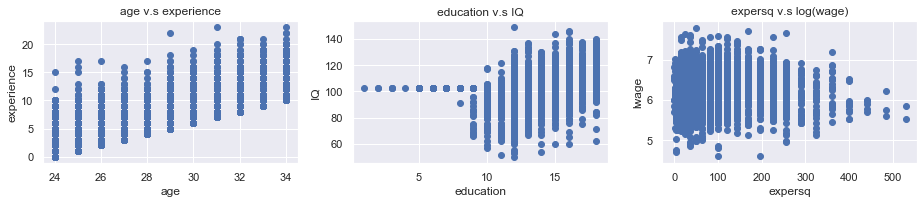

In [127]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(13,3))

ax1.scatter(new_card.age, new_card.exper)
ax1.set_title('age v.s experience')
ax1.set_xlabel("age")
ax1.set_ylabel("experience")

ax2.scatter(new_card.educ, new_card.IQ)
ax2.set_title("education v.s IQ")
ax2.set_xlabel("education")
ax2.set_ylabel("IQ")

ax3.scatter(new_card.expersq, new_card.lwage)
ax3.set_title("expersq v.s log(wage)")
ax3.set_xlabel("expersq")
ax3.set_ylabel("lwage")


fig.tight_layout()
plt.show()

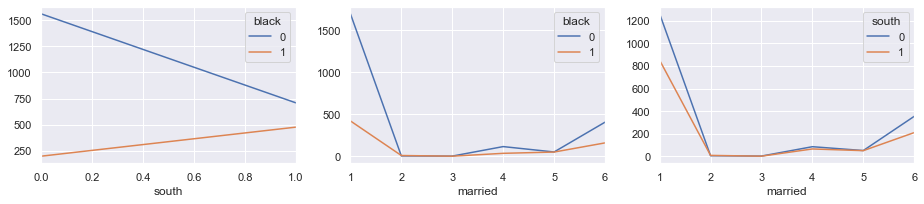

In [128]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3,figsize=(13,3))

new_card.groupby(['south','black']).count()['lwage'].unstack().plot(ax=ax1)
new_card.groupby(['married','black']).count()['lwage'].unstack().plot(ax=ax2)
new_card.groupby(['married','south']).count()['lwage'].unstack().plot(ax=ax3)

fig.tight_layout()
plt.show()

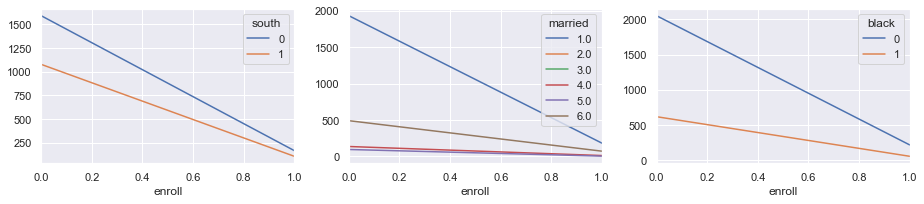

In [129]:
fig, (ax4, ax5, ax6) = plt.subplots(nrows=1, ncols=3,figsize=(13,3))

new_card.groupby(['enroll','south']).count()['lwage'].unstack().plot(ax=ax4)
new_card.groupby(['enroll','married']).count()['lwage'].unstack().plot(ax=ax5)
new_card.groupby(['enroll','black']).count()['lwage'].unstack().plot(ax=ax6)

fig.tight_layout()
plt.show()

### Model Selection

In [130]:
from sklearn.model_selection import train_test_split

X=new_card.drop(columns=['id','lwage'])
y=new_card['lwage']
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.2)

In [131]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

### KNN

Text(0, 0.5, 'R-sq')

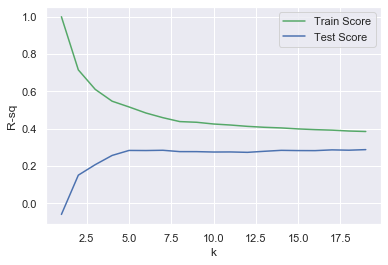

In [132]:
# KNN Regressor - method 1: For loop
from sklearn.neighbors import KNeighborsRegressor

train_score_array = []
test_score_array = []

for k in range(1,20):
    knn_reg = KNeighborsRegressor(k)
    knn_reg.fit(X_train, y_train)
    train_score_array.append(knn_reg.score(X_train, y_train))
    test_score_array.append(knn_reg.score(X_test, y_test))

x_axis = range(1,20)
plt.plot(x_axis, train_score_array, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_array, c = 'b', label = 'Test Score')
plt.legend()
plt.xlabel('k')
plt.ylabel('R-sq')

In [133]:
# KNN Regressor - method 2: GridSearchCV
from sklearn.model_selection import GridSearchCV

k_range = list(range(1,10))
param_grid = dict(n_neighbors=k_range)

grid_knn = GridSearchCV(KNeighborsRegressor(), param_grid, cv =5, return_train_score=True)
grid_knn.fit(X_train, y_train)
knn_train = knn_reg.score(X_train, y_train)
knn_test = knn_reg.score(X_test, y_test)
print('train score: ',knn_train)
print('test score: ',knn_test)
print('Best parameter: {}'.format(grid_knn.best_params_))
print('Best cross-validation score: {:.4f}'.format(grid_knn.best_score_))
print(grid_knn.scorer_)

train score:  0.3854133245702819
test score:  0.2883726961018602
Best parameter: {'n_neighbors': 9}
Best cross-validation score: 0.2834
<function _passthrough_scorer at 0x00000240161D9B70>


### Linear Regression

In [134]:
# Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

lreg = LinearRegression()
lreg.fit(X_train, y_train)
linear_train = lreg.score(X_train, y_train)
linear_test = lreg.score(X_test, y_test)
print('train score: ',linear_train)
print('test score: ',linear_test)

scores_l = cross_val_score(lreg, X_train, y_train, cv=5)
print("Cross-validation scores: {}".format(scores_l))
print("Average cross-validation score: {:.2f}".format(scores_l.mean()))
print("Best cross-validation score: {:.2f}".format(scores_l.max()))

train score:  0.9042230670941058
test score:  0.9049895803264076
Cross-validation scores: [0.89655168 0.8894826  0.91011276 0.89249598 0.91500828]
Average cross-validation score: 0.90
Best cross-validation score: 0.92


### SGD Regressor

In [135]:
# SGD Regressor
from sklearn.linear_model import SGDRegressor

param_grid = {"penalty":["l1",'l2']}

grid_sgd = GridSearchCV(SGDRegressor(), param_grid, cv=5, return_train_score=True)
grid_sgd.fit(X_train, y_train)
sgd_train = grid_sgd.score(X_train, y_train)
sgd_test = grid_sgd.score(X_test, y_test)
print('train score: ',sgd_train)
print('test score: ',sgd_test)
print("Best parameters: {}".format(grid_sgd.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_sgd.best_score_))

train score:  0.6135455614505377
test score:  0.6393907632392177
Best parameters: {'penalty': 'l1'}
Best cross-validation score: 0.56


### Polynomial Regression

Cross-validation scores: [ 9.71288262e-01 -3.69069727e+18 -3.77635259e+16  9.74720537e-01
  9.76738683e-01]
Average cross-validation score: -745692158420862720.00
Best cross-validation score: 0.98


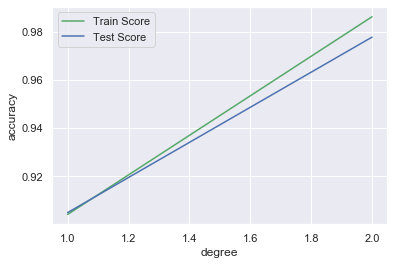

In [136]:
# Polynomial Regression
from  sklearn.preprocessing  import PolynomialFeatures
train_score_list = []
test_score_list = []

for n in range(1,3):
    poly = PolynomialFeatures(n)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    lreg.fit(X_train_poly, y_train)
    train_score_list.append(lreg.score(X_train_poly, y_train))
    test_score_list.append(lreg.score(X_test_poly, y_test))

%matplotlib inline

x_axis = range(1,3)
plt.plot(x_axis, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_list, c = 'b', label = 'Test Score')
plt.xlabel('degree')
plt.ylabel('accuracy')
plt.legend()

scores_poly = cross_val_score(lreg, X_train_poly, y_train, cv=5)
print("Cross-validation scores: {}".format(scores_poly))
print("Average cross-validation score: {:.2f}".format(scores_poly.mean()))
print("Best cross-validation score: {:.2f}".format(scores_poly.max()))

In [137]:
poly = PolynomialFeatures(2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
poly_train = lreg.score(X_train_poly, y_train)
poly_test = lreg.score(X_test_poly, y_test)

print('Train score: ',poly_train)
print('Test score: ',poly_test)

Train score:  0.9861871984819596
Test score:  0.9777452151694604


### Ridge Regression

Text(0.5, 0, '$\\alpha$')

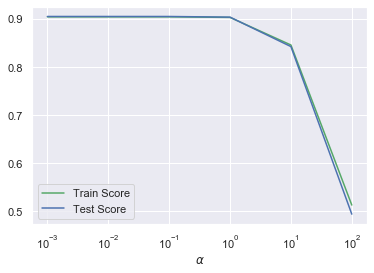

In [138]:
# Ridge Regression - method 1: For loop
from sklearn.linear_model import Ridge

x_range = [0.001, 0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train,y_train)
    train_score_list.append(ridge.score(X_train,y_train))
    test_score_list.append(ridge.score(X_test, y_test))
    
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

In [139]:
# Ridge Regression - method 2: GridSearchCV
param_grid = {"alpha":[0.001, 0.01, 0.1, 1, 10, 100]}

grid_r = GridSearchCV(Ridge(), param_grid, cv=5, return_train_score=True)
grid_r.fit(X_train, y_train)
print("Best parameters: {}".format(grid_r.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_r.best_score_))

Best parameters: {'alpha': 0.01}
Best cross-validation score: 0.90


In [140]:
ridge = Ridge(0.01)
ridge.fit(X_train,y_train)
ridge_train = ridge.score(X_train,y_train)
ridge_test = ridge.score(X_test, y_test)

print('Train score: ',ridge_train)
print('Test score: ',ridge_test)

Train score:  0.9042226553563266
Test score:  0.9049863393964055


### Lasso Regression

Text(0.5, 0, '$\\alpha$')

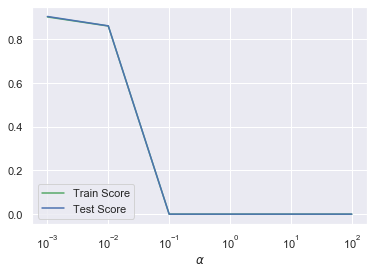

In [141]:
# Lasso Regression - method 1: For loop
from sklearn.linear_model import Lasso
x_range = [0.001, 0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train,y_train)
    train_score_list.append(lasso.score(X_train,y_train))
    test_score_list.append(lasso.score(X_test, y_test))
    
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

In [142]:
# Lasso Regression - method 2: GridSearchCV
param_grid = {"alpha":[0.001, 0.01, 0.1, 1, 10, 100]}

grid_lasso = GridSearchCV(Lasso(), param_grid, cv=5, return_train_score=True)
grid_lasso.fit(X_train, y_train)

print("Best parameters: {}".format(grid_lasso.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_lasso.best_score_))

Best parameters: {'alpha': 0.001}
Best cross-validation score: 0.90


In [143]:
lasso = Lasso(0.001)
lasso.fit(X_train,y_train)
lasso_train = lasso.score(X_train,y_train)
lasso_test = lasso.score(X_test, y_test)

print('Train score: ',lasso_train)
print('Test score: ',lasso_test)

Train score:  0.90287149445898
Test score:  0.905015176395527


### Decision Tree

In [144]:
# Decision Tree - method 1
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor().fit(X_train_org, y_train)
print('train score: ',tree.score(X_train_org, y_train))
print('test score: ',tree.score(X_test_org, y_test))

scores = cross_val_score(tree, X_train, y_train, cv=5)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

train score:  0.9999999785664802
test score:  0.9997536695063355
Cross-validation scores: [0.99983589 0.99934175 0.9996826  0.99960475 0.99960739]
Average cross-validation score: 1.00


In [145]:
# Decision Tree Regression - method 2: GridSearchCV
param_grid = {'max_depth': list(range(1,101))}

grid_dt = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5, return_train_score=True)
grid_dt.fit(X_train, y_train)
print("Best parameters: {}".format(grid_dt.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_dt.best_score_))

Best parameters: {'max_depth': 14}
Best cross-validation score: 1.00


In [146]:
tree = DecisionTreeRegressor(max_depth=48).fit(X_train_org, y_train)
dt_train = tree.score(X_train_org, y_train)
dt_test = tree.score(X_test_org, y_test)
print('train score: ',dt_train)
print('test score: ',dt_test)

train score:  0.9999999785664802
test score:  0.9998223309499923


In [149]:
report_table = [['KNN', grid_knn.best_params_, 
                 grid_knn.best_score_, 
                 knn_train, knn_test, 
                 ]] + [['Linear', '', 
                 scores_l.max(), 
                 linear_train, linear_test, 
                 ]] + [['SGB', grid_sgd.best_params_, 
                 grid_sgd.best_score_, 
                 sgd_train, sgd_test, 
                 ]] + [['Polynomial', '', 
                 scores_poly.max(), 
                 poly_train, poly_test, 
                 ]] + [['Ridge', grid_r.best_params_, 
                 grid_r.best_score_, 
                 ridge_train, ridge_test, 
                 ]] + [['Lasso', grid_lasso.best_params_, 
                 grid_lasso.best_score_, 
                 lasso_train, lasso_test, 
                 ]] + [['DecisionTree', grid_dt.best_params_, 
                 grid_dt.best_score_, 
                 dt_train, dt_test, 
                 ]]

In [150]:
report = pd.DataFrame(report_table,
                      columns = ['Model', 'Best parameter',
                                 'Best cv score', 'Train score', 
                                 'Test score'])
report.index = report.index + 1
report

,Model,Best parameter,Best cv score,Train score,Test score
1,KNN,{'n_neighbors': 9},0.283437,0.385413,0.288373
2,Linear,,0.915008,0.904223,0.904990
3,SGB,{'penalty': 'l1'},0.560911,0.613546,0.639391
4,Polynomial,,0.976739,0.986187,0.977745
5,Ridge,{'alpha': 0.01},0.900761,0.904223,0.904986
6,Lasso,{'alpha': 0.001},0.900847,0.902871,0.905015
7,DecisionTree,{'max_depth': 14},0.999753,1.000000,0.999822
